# CEE 690-02

# Environmental Spatial Data Analysis

# Clustering II

# Gaussian Mixture Model (GMM)

# GMM characteristics

* **Fuzzy** - Each data point belongs to every cluster with a weight or probability (different from K-means)
* **Partitional** - It divides the n-dimensional space into k non-overlapping clusters
* **Complete** - Each data point is assigned to a cluster

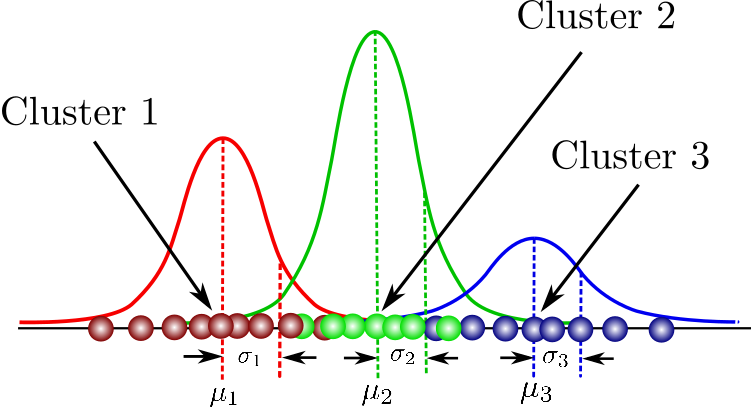

Source: https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

# Let's first review multivariate Gaussian distributions

# Bivariate Gaussian Distribution

### Probabilitiy density function

$$f(x,y) = \frac{1}{2\pi\sqrt{\sigma_X^2\sigma_Y^2(1-\rho^2)}}\exp\left({-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_X)^2}{\sigma^2_X} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}\right]}\right)$$

Where $\mu_X$ and $\mu_Y$ are the means or expectations of $X$ and $Y$, $\sigma^2_X$ and $\sigma^2_Y$ are the variances of $X$ and $Y$, and $\rho$ is the linear correlation (Pearson correlation) between $X$ and $Y$.

Let's place $x$ and $y$ into a single vector $X$,

$$\mathbf{x} = \begin{bmatrix}
x\\
y\\
\end{bmatrix}$$

All the means into a single vector $\mu$,

$$\mathbf{\mu} = \begin{bmatrix}
\mu_X\\
\mu_Y\\
\end{bmatrix}$$


And all the variances and the covariance into a single covariance matrix $\mathbf{\Sigma}$:

$$\mathbf{\Sigma} = \begin{bmatrix}
\sigma^2_X&\text{cov}(X,Y)\\
\text{cov}(Y,X)&\sigma^2_Y\\
\end{bmatrix}$$

We can the define the bivariate distribution as:

$$f(X,Y) = \frac{\exp\left(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right)}{\sqrt{(2\pi)^2|\mathbf{\Sigma}|}}$$

Where $|\mathbf{\Sigma}|$ is the determinant of $\mathbf{\Sigma}$.

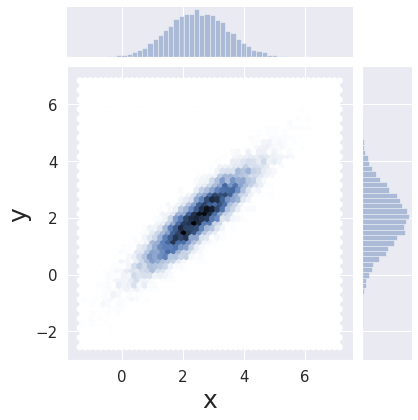

In [2]:
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
mu = np.array([2.5,2.0])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X = np.random.multivariate_normal(mu,cov, 10000)
df = pd.DataFrame(data={'x':X[:,0],'y':X[:,1]})
sns.jointplot(x='x', y='y',data=df,kind='hex')
plt.show()

# Multivariate Gaussian Distribution

From our bivariate example, we can define the n-dimensional Gaussian distribution:

$$f(\mathbf{x}) = \frac{\exp\left(-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right)}{\sqrt{(2\pi)^{n}|\mathbf{\Sigma}|}}$$

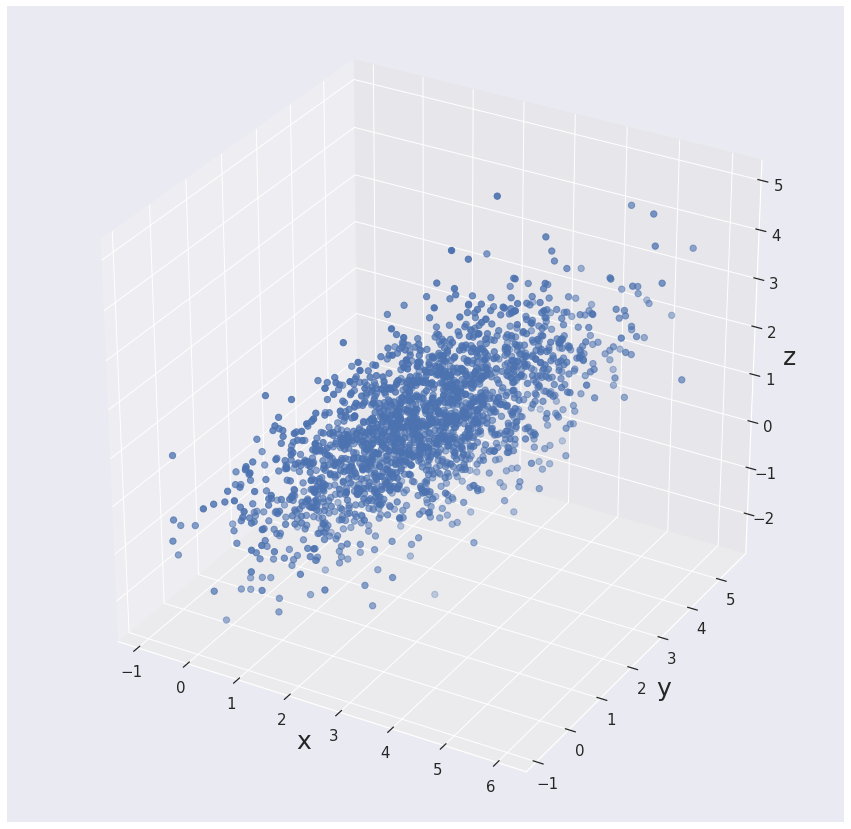

In [3]:
from mpl_toolkits.mplot3d import Axes3D
mu = np.array([2.5,2.0,1.0])
cov = np.array([[1.0,0.9,0.5],
                [0.9,1.0,0.7],
                [0.5,0.7,1.0]])
X = np.random.multivariate_normal(mu,cov, 2000)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],s=40)
ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
ax.set_zlabel('z',fontsize=25)
plt.show()

# Let's go back to the Gaussian Mixture Model

As an example, let's initialize three identical bivariate Gaussians that only differ in their means (we saw this example last lecture).

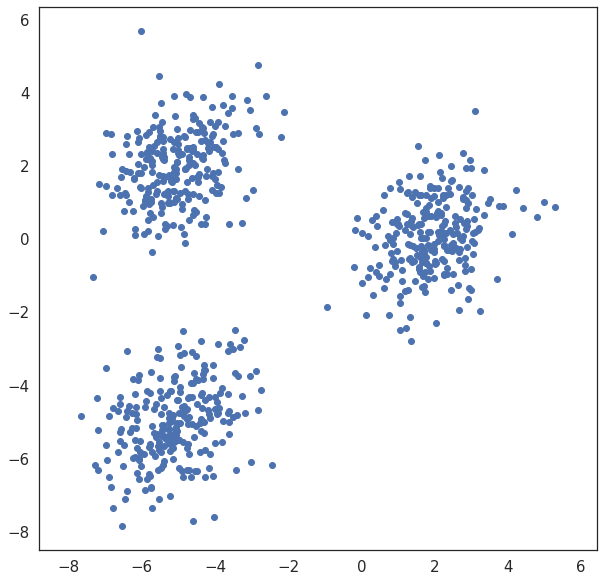

In [7]:
sns.set_style('white')
np.random.seed(1)
mean = np.array([2.0,0.1])
cov = np.array([[1.0,0.3],[0.3,1.0]])
X0 = np.random.multivariate_normal(mean,cov,250)
mean = np.array([-5.0,2.0])
cov = np.array([[1.0,0.3],[0.3,1.0]])
X1 = np.random.multivariate_normal(mean,cov,250)
mean = np.array([-5.0,-5.0])
cov = np.array([[1.0,0.3],[0.3,1.0]])
X2 = np.random.multivariate_normal(mean,cov,250)
X = np.concatenate((X0,X1,X2),axis=0)
#Let's plot the synthetic clusters
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

# Clustering using Gaussians

The three clusters are bivariate Gaussian distributions. 

In theory, we could "fit" three bivariate Gaussians to retrieve the cluster assignment of each point

Actually, we can go a little further than that and associate a weight of each data point belonging to one of the three bivariate Gaussian distributions.

# Gaussian Mixture Model

Let us assume that all the data points from our plot originate from a random variable $\mathbf{X}$. Then to model them, we can assume that the probability density function at a given point $\mathbf{x}_n$ is:

$$f(\mathbf{x}_n) = \sum_{i=1}^k\pi_i\mathcal{N(\mathbf{x}_n|\mu_i,\Sigma_i)}$$ 

Where $\mathcal{N}(\mu_i,\Sigma_i)$ is the probability density function of the $i$th multivariate Gaussian distribution and $\pi_i$ is the weight assigned to a given pdf. 

# Fitting GMMs: Expectation-Maximization Algorithm (EM)

* EM holds strong similarities with the algorithm used to fit K-means. 

* K-means can actually be interpreted as a largely simplified Gaussian Mixture Model. 

* When fitting the Gaussian mixture model, EM uses two steps per iteration: expectation and maximization. 

* We won't be looking into the details for this course. If you are interested, just Google it.

* Here is an example of how it fits two bivariate Gaussians to some 2d data. 

<img src="Images/GMM_EM.gif">

Source: https://en.wikipedia.org/wiki/File:EM_Clustering_of_Old_Faithful_data.gif

# Let's apply GMM to our data

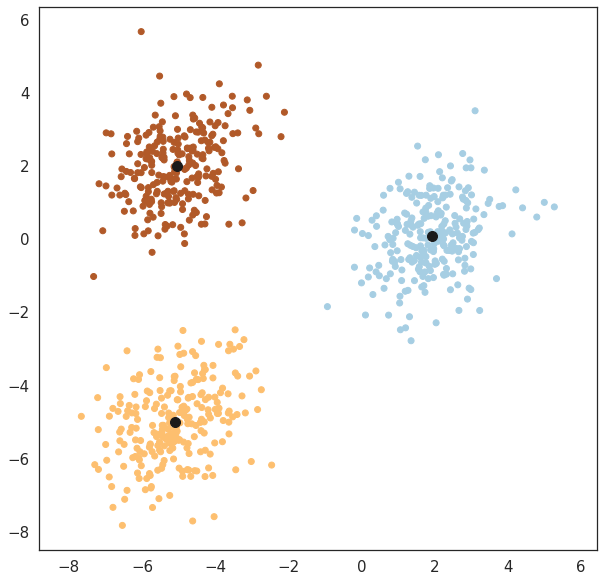

In [14]:
import sklearn.mixture
#Set 3 clusters
k = 3
model = sklearn.mixture.GaussianMixture(n_components=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
plt.axis('equal')
plt.show()

## Let's look at an example where K-means failed

#### 1. Initialize multivariate Gaussians with non-spherical covariance matrices

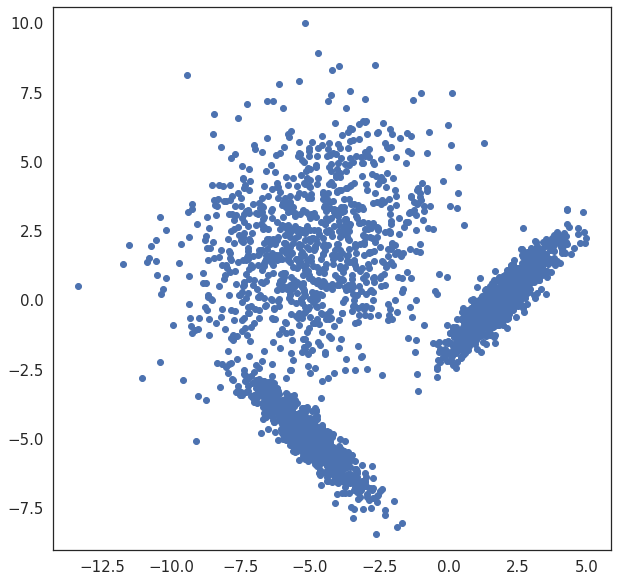

In [80]:
np.random.seed(1)
mean = np.array([2.0,0.1])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X0 = np.random.multivariate_normal(mean,cov,1000)
mean = np.array([-5.0,2.0])
cov = np.array([[5.0,1.0],[1.0,5.0]])
X1 = np.random.multivariate_normal(mean,cov,1000)
mean = np.array([-5.0,-5.0])
cov = np.array([[1.0,-0.9],[-0.9,1.0]])
X2 = np.random.multivariate_normal(mean,cov,1000)
X = np.concatenate((X0,X1,X2),axis=0)
#Let's plot the synthetic clusters
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

#### 2. Run K-means on the data

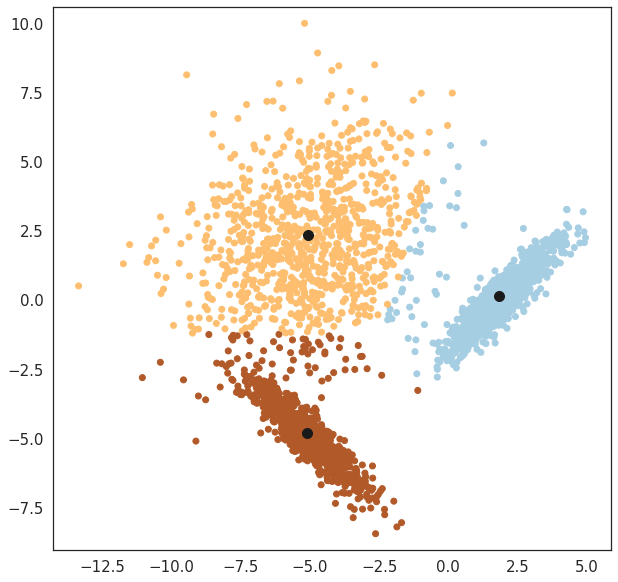

In [81]:
#Set 3 clusters
k = 3
model = sklearn.cluster.KMeans(n_clusters=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k',s=100)
plt.axis('equal')
plt.show()

#### 3. Run GMM on the same data

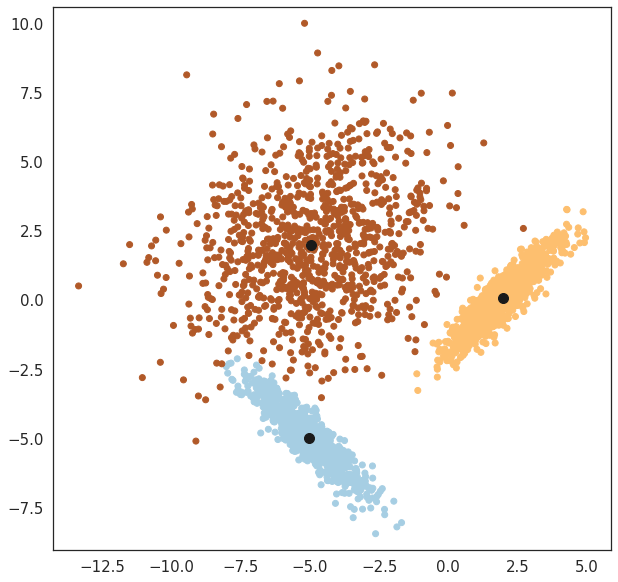

In [82]:
#Set 3 clusters
k = 3
model = sklearn.mixture.GaussianMixture(n_components=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
plt.axis('equal')
plt.show()

Much better! GMM is able to account for non-spherical covariance matrices. This allows it to fit the "cigar" shapes. 

## Predicted weights of each bivariate Gaussian per data point 

(3000, 3)


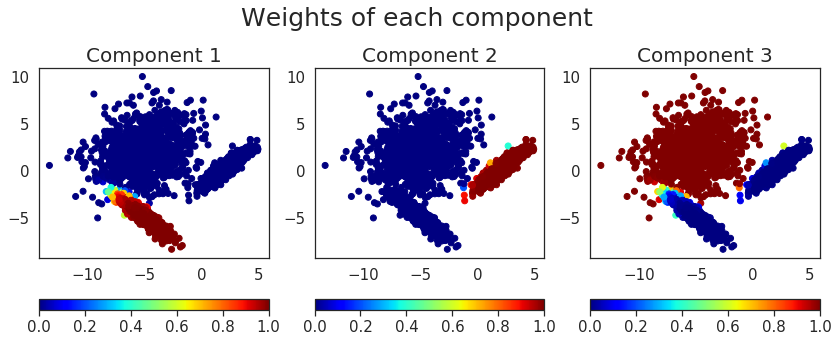

In [83]:
#Predict the weights per component
weights = model.predict_proba(X)
print(weights.shape)
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.title('Component 1',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,0],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
cb.draw_all()
plt.subplot(132)
plt.title('Component 2',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,1],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
plt.subplot(133)
plt.title('Component 3',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,2],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
plt.suptitle('Weights of each component',y=1.05,fontsize=25)
#plt.tight_layout()
plt.show()

## We still need to worry about scaling our data

#### 1. Initialize multivariate Gaussians with non-spherical covariance matrices

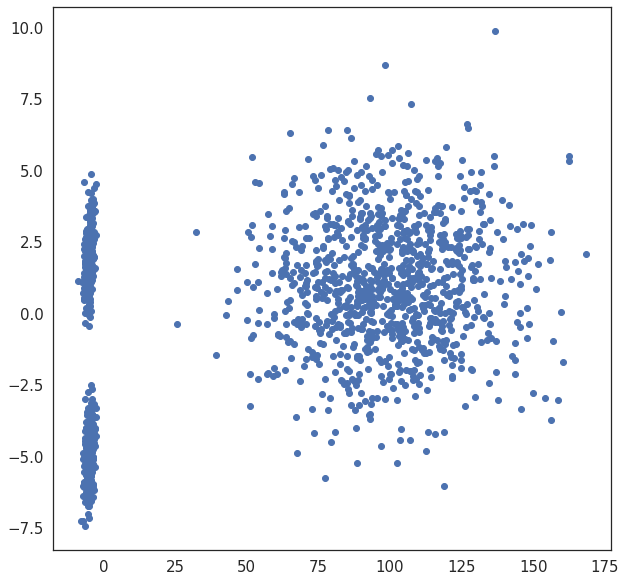

In [84]:
np.random.seed(1)
mean = np.array([100.0,1.0])
cov = np.array([[500.0,0.1],[0.1,5.0]])
X0 = np.random.multivariate_normal(mean,cov,1000)
mean = np.array([-5.0,2.0])
cov = np.array([[1.0,0.3],[0.3,1.0]])
X1 = np.random.multivariate_normal(mean,cov,250)
mean = np.array([-5.0,-5.0])
cov = np.array([[1.0,0.3],[0.3,1.0]])
X2 = np.random.multivariate_normal(mean,cov,250)
X = np.concatenate((X0,X1,X2),axis=0)
#Let's plot the synthetic clusters
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
#plt.axis('equal')
plt.show()

#### 2. Run GMM on the data

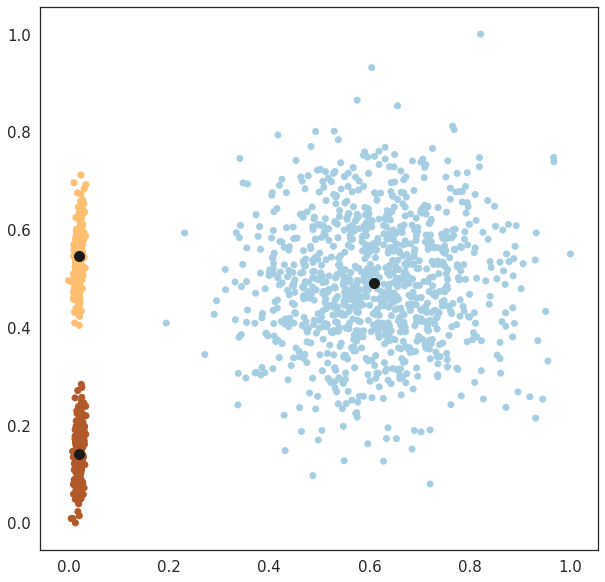

In [85]:
Xn = (X - np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)) 
#Set 3 clusters
k = 3
model = sklearn.mixture.GaussianMixture(n_components=k,n_init=10)
#Fit the model
model.fit(Xn)
#Predict the clusters on all the data
clusters = model.predict(Xn)
plt.figure(figsize=(10,10))
plt.scatter(Xn[:,0],Xn[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
#plt.axis('equal')
plt.show()

# GMM: Be careful with initialization!

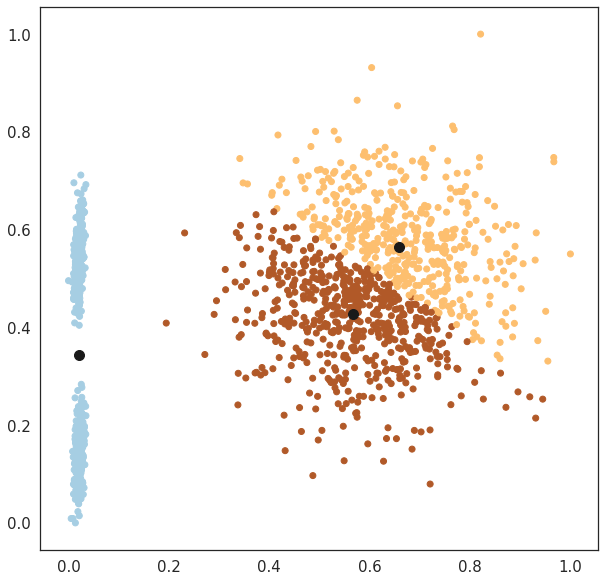

In [92]:
Xn = (X - np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)) 
#Set 3 clusters
k = 3
model = sklearn.mixture.GaussianMixture(n_components=k,n_init=1)
#Fit the model
model.fit(Xn)
#Predict the clusters on all the data
clusters = model.predict(Xn)
plt.figure(figsize=(10,10))
plt.scatter(Xn[:,0],Xn[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
#plt.axis('equal')
plt.show()

To avoid ending up at a "bad" local minima, run GMM run multiple times via the `n_init` parameter. It will then choose the best fit.

# Let's apply GMM to our "dove" from last lecture

In [182]:
#Import data
import rasterio
import numpy as np
data = {}
file = '../Workspace/dem.tif'
data['dem'] = rasterio.open(file).read(1)
file = '../Workspace/ppt.tif'
data['ppt'] = rasterio.open(file).read(1)
file = '../Workspace/tmean.tif'
data['tmean'] = rasterio.open(file).read(1)
file = '../Workspace/treecover.tif'
data['tcf'] = rasterio.open(file).read(1)
file = '../Workspace/barecover.tif'
data['bcf'] = rasterio.open(file).read(1)
file = '../Workspace/sand.tif'
data['sand'] = rasterio.open(file).read(1)
#Create lats/lons arrays
fp = rasterio.open(file)
lons = np.linspace(fp.bounds.left+fp.res[0]/2,fp.bounds.right-fp.res[0]/2,data['sand'].shape[1])
lats = np.linspace(fp.bounds.bottom+fp.res[1]/2,fp.bounds.top-fp.res[1]/2,data['sand'].shape[0])
(lons,lats) = np.meshgrid(lons,lats)
#(lons,lats) = np.meshgrid(lats,lons)
data['lon'] = lons[:]
data['lat'] = np.flipud(lats[:])

#### 1. Run GMM on the data

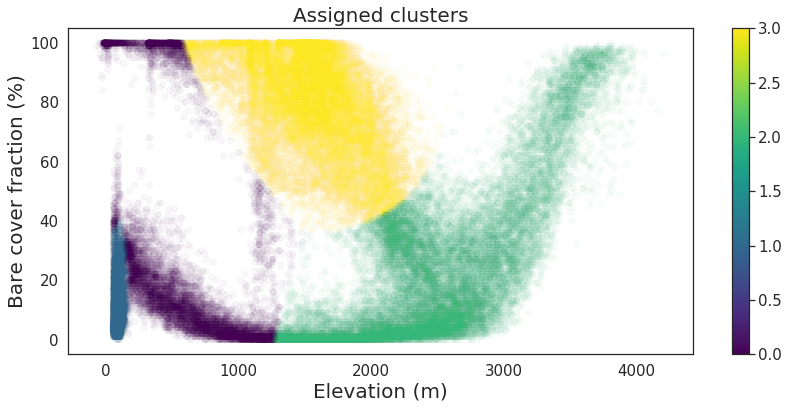

In [183]:
import sklearn.mixture
#Bring in the data
v1 = data['dem'].reshape(data['dem'].size)
v2 = data['bcf'].reshape(data['bcf'].size)
#Create data for scikit-learn
X = np.stack((v1,v2)).T
#Normalize the data
Xn = (X - np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
#Define the number of clusters
k = 4
np.random.seed(1)
model = sklearn.mixture.GaussianMixture(n_components=k,n_init=3)
#Subsample data to fit the model (minimize computation)
idx = np.random.choice(np.arange(X.shape[0]),5000)
Xs = X[idx,:]
#Fit the model
model.fit(Xs)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.figure(figsize=(14,6))
plt.title('Assigned clusters',fontsize=20)
plt.scatter(data['dem'].reshape(data['dem'].size),data['bcf'].reshape(data['bcf'].size),
            c=clusters,cmap=plt.get_cmap('viridis'),alpha=0.03)
cb = plt.colorbar()
#Ensure the alpha of the colorbar is 1.0
cb.set_alpha(1.0)
cb.draw_all()
plt.xlabel('Elevation (m)',fontsize=20)
plt.ylabel('Bare cover fraction (%)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### 2. Show associated weights

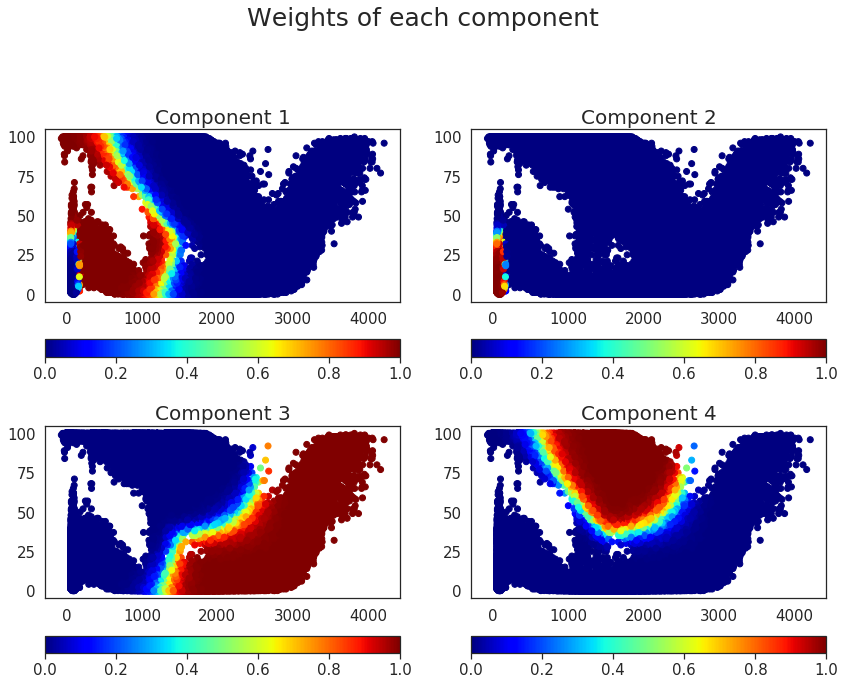

In [102]:
#Predict the weights per component
weights = model.predict_proba(X)
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('Component 1',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,0],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
cb.draw_all()
plt.subplot(222)
plt.title('Component 2',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,1],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
plt.subplot(223)
plt.title('Component 3',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,2],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
plt.subplot(224)
plt.title('Component 4',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=weights[:,3],cmap=plt.get_cmap('jet'),vmin=0,vmax=1)
cb = plt.colorbar(orientation='horizontal')
plt.suptitle('Weights of each component',y=1.05,fontsize=25)
#plt.tight_layout()
plt.show()

# Reproduce original maps

In [103]:
#Assign the cluster centroid values to each cluster
Xpred = np.copy(X)
for i in range(k):
    m = clusters == i
    Xpred[m,:] = np.mean(X[m,:],axis=0)
dem_pred = Xpred[:,0].reshape(data['dem'].shape)
bcf_pred = Xpred[:,1].reshape(data['bcf'].shape)

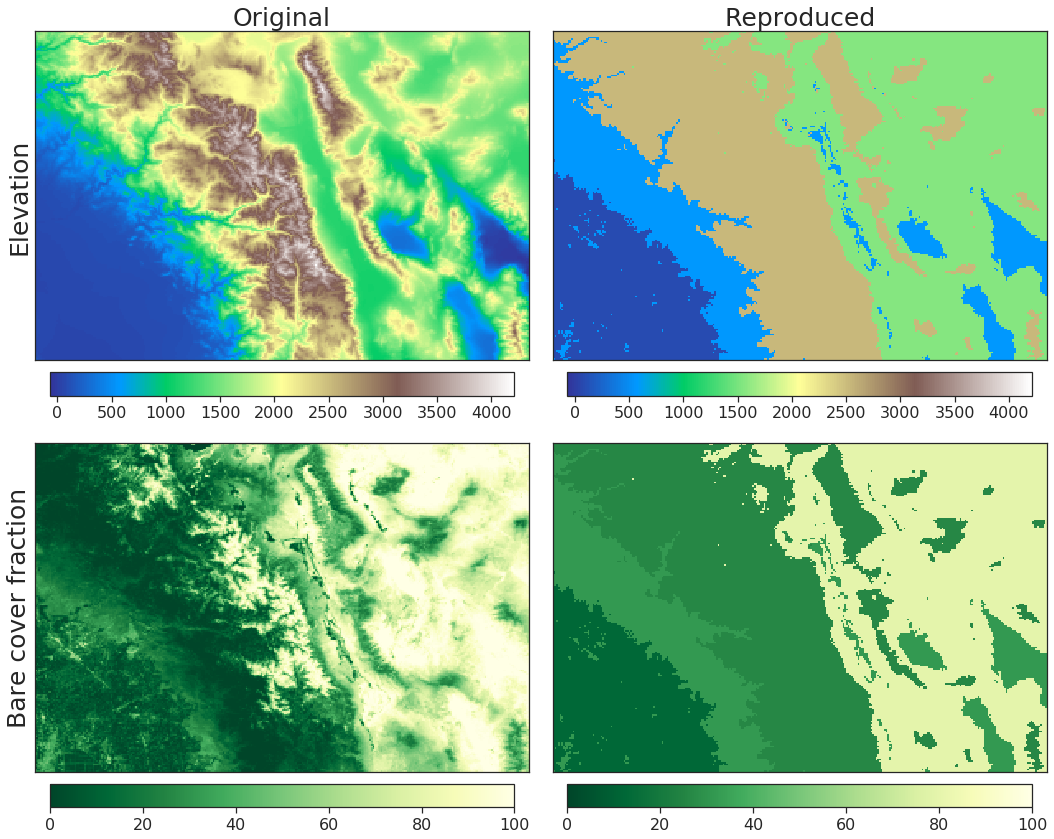

In [104]:
#Create a figure comparing them
#Compare the two
vmin = np.min(data['dem'])
vmax = np.max(data['dem'])
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(data['dem'],vmin=vmin,vmax=vmax,cmap=plt.get_cmap('terrain'))
plt.ylabel('Elevation',fontsize=25)
plt.title('Original',fontsize=25)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.subplot(222)
plt.title('Reproduced',fontsize=25)
plt.imshow(dem_pred,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
vmin = np.min(data['bcf'])
vmax = np.max(data['bcf'])
plt.subplot(223)
plt.imshow(data['bcf'],vmin=vmin,vmax=vmax,cmap=plt.get_cmap('YlGn_r'))
plt.ylabel('Bare cover fraction',fontsize=25)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.subplot(224)
plt.imshow(bcf_pred,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('YlGn_r'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

# Reproduce original maps: Leverage weights

In [184]:
#Xpred = np.copy(X)
#for i in range(k):
#    m = clusters == i
#    #Sum using weights
#    Xpred[m,:] = np.sum(weights[m,:,np.newaxis]*model.means_[np.newaxis,:,:],axis=1)
Xpred = np.sum(weights[:,:,np.newaxis]*model.means_[np.newaxis,:,:],axis=1)
dem_pred = Xpred[:,0].reshape(data['dem'].shape)
bcf_pred = Xpred[:,1].reshape(data['bcf'].shape)

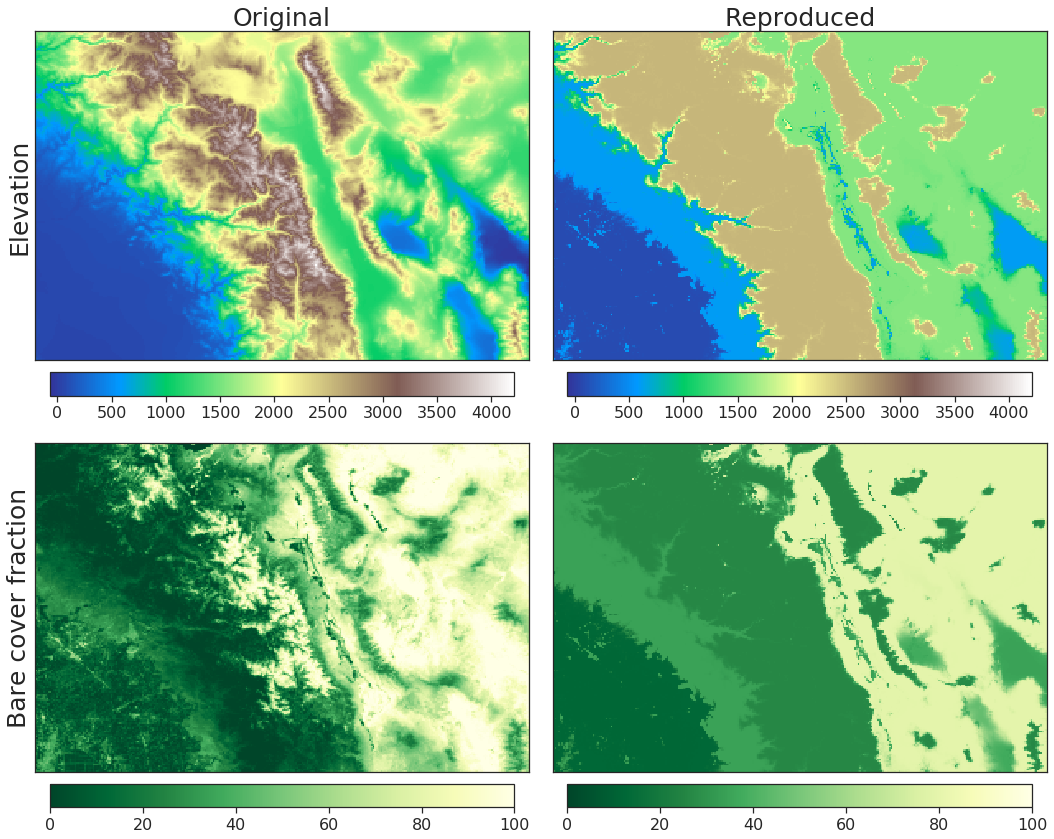

In [185]:
#Create a figure comparing them
#Compare the two
vmin = np.min(data['dem'])
vmax = np.max(data['dem'])
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(data['dem'],vmin=vmin,vmax=vmax,cmap=plt.get_cmap('terrain'))
plt.ylabel('Elevation',fontsize=25)
plt.title('Original',fontsize=25)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.subplot(222)
plt.title('Reproduced',fontsize=25)
plt.imshow(dem_pred,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
vmin = np.min(data['bcf'])
vmax = np.max(data['bcf'])
plt.subplot(223)
plt.imshow(data['bcf'],vmin=vmin,vmax=vmax,cmap=plt.get_cmap('YlGn_r'))
plt.ylabel('Bare cover fraction',fontsize=25)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.subplot(224)
plt.imshow(bcf_pred,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('YlGn_r'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',pad=0.03,shrink=0.90)
cb.ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

It helps define smoother boundaries between the mapped out clusters

# GMM summary I

### Characteristics

* **Fuzzy** - Each data point belongs to every cluster with a weight or probability (different from K-means)
* **Partitional** - It divides the n-dimensional space into k non-overlapping clusters
* **Complete** - Each data point is assigned to a cluster

# GMM summary II

### Pros:
* Fit clusters to non-spherical shapes
* Assign weights to each component (fuzzy allocation)
* Great for partitioning the data (vector quantization)

### Cons:
* Not computationally scalable (due to covariance matrix). 
* Only finds local minima (centroid initialization is a problem)

# Shapes of clusters where both K-means and GMM fail

#### 1. Make some data

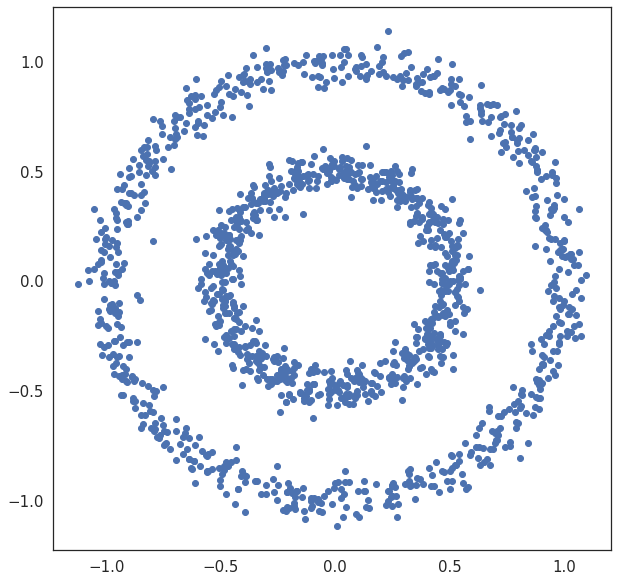

In [176]:
import sklearn.datasets
n_samples = 1500
X = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'bo')
plt.show()

#### 2. Fit and plot both K-means and GMM

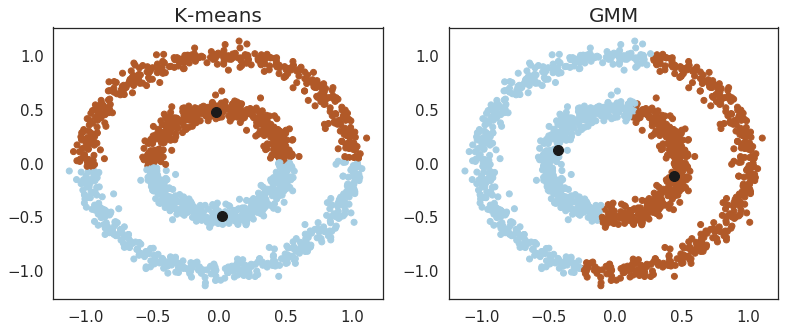

In [147]:
#Set 2 clusters
k = 2
#K-means
model = sklearn.cluster.KMeans(n_clusters=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('K-means',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k',s=100)
#GMM
model = sklearn.mixture.GaussianMixture(n_components=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
plt.subplot(122)
plt.title('GMM',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
plt.show()

The mean is not useful to define these clusters

We are going to explore some alternatives that allow us to solve these problems

# Option 1: Hierarchical clustering

Note: The source of the following slides is: https://www-users.cs.umn.edu/~kumar001/dmbook/index.php

The slides themselves are derived from "Introduction to Data Mining" (Tan et al., 2019). 

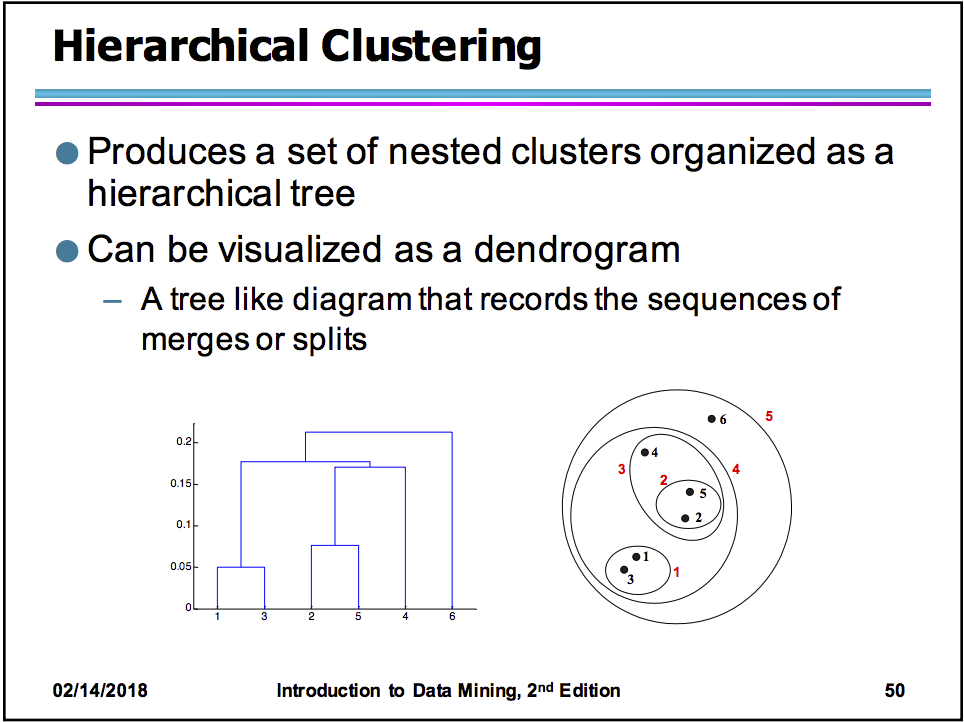

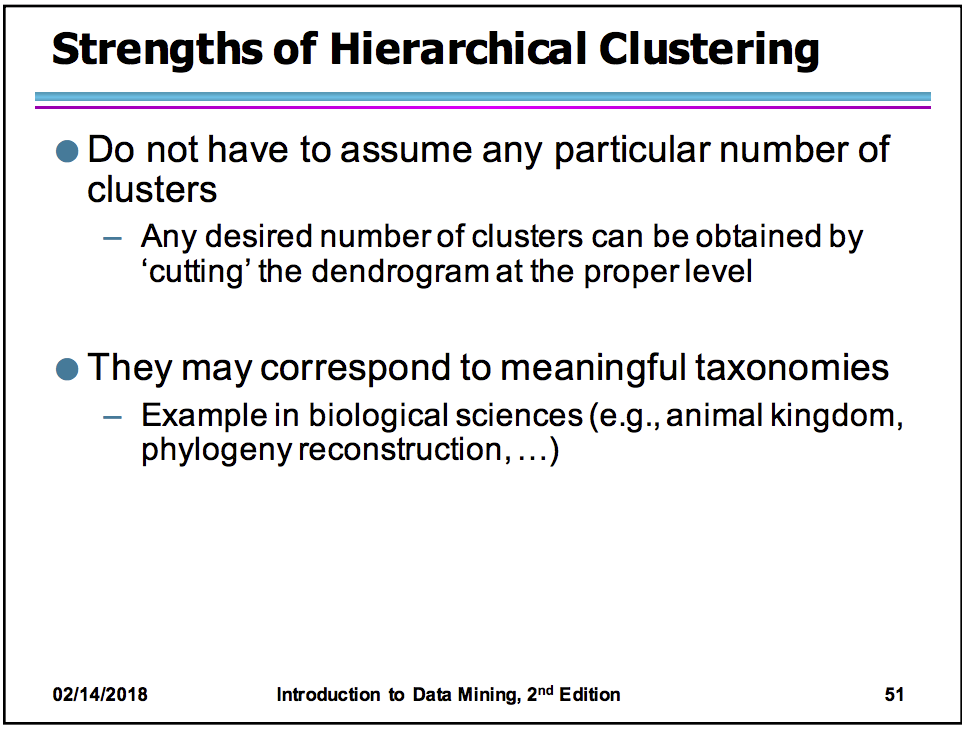

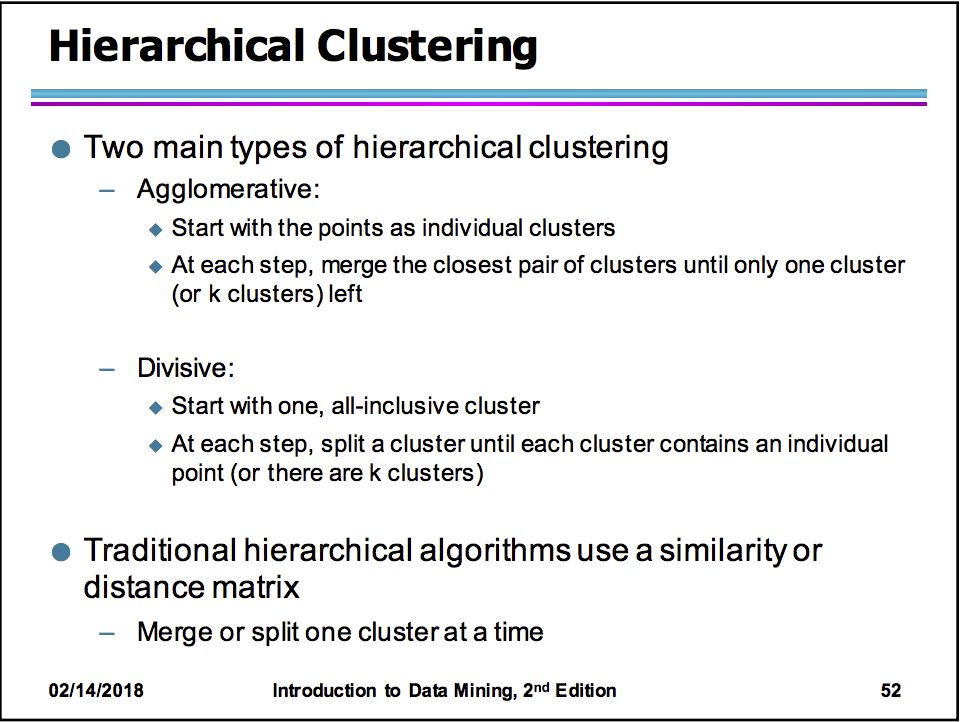

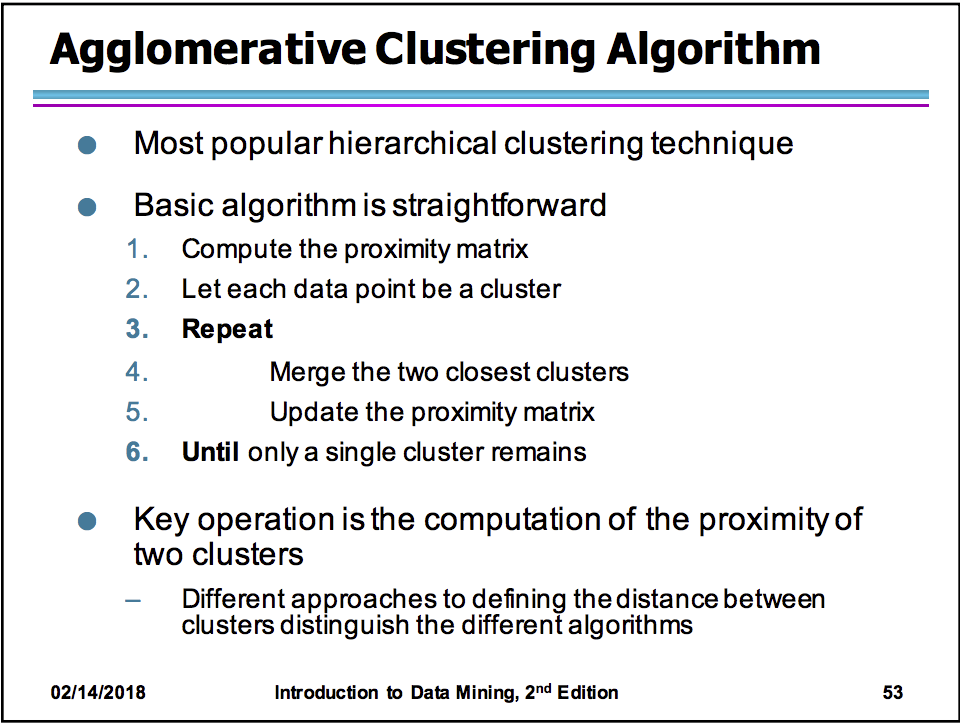

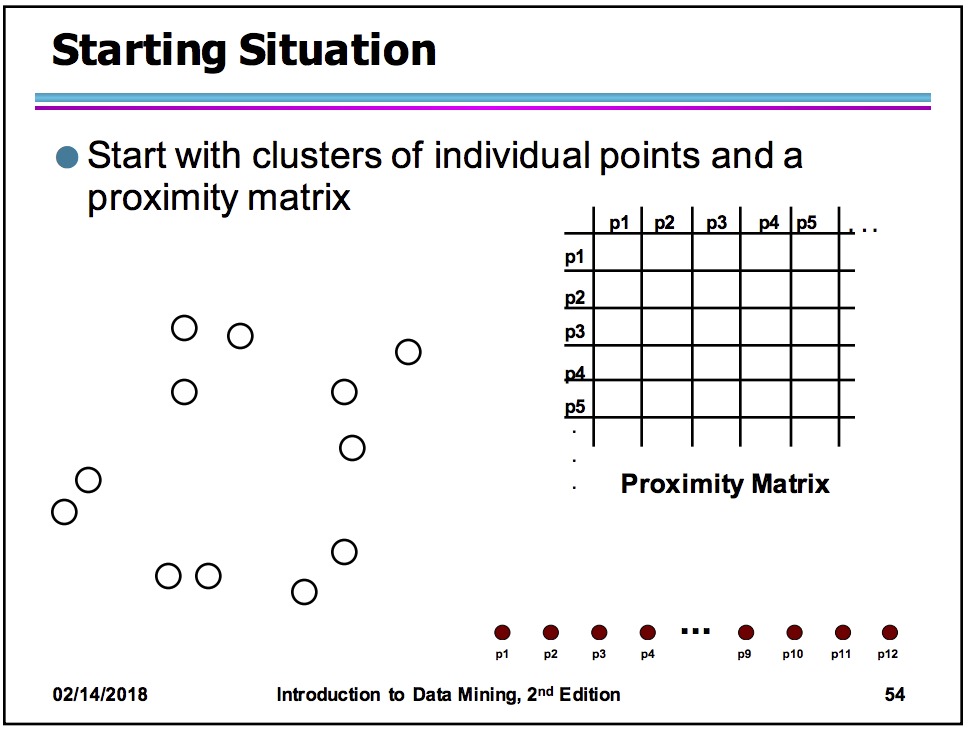

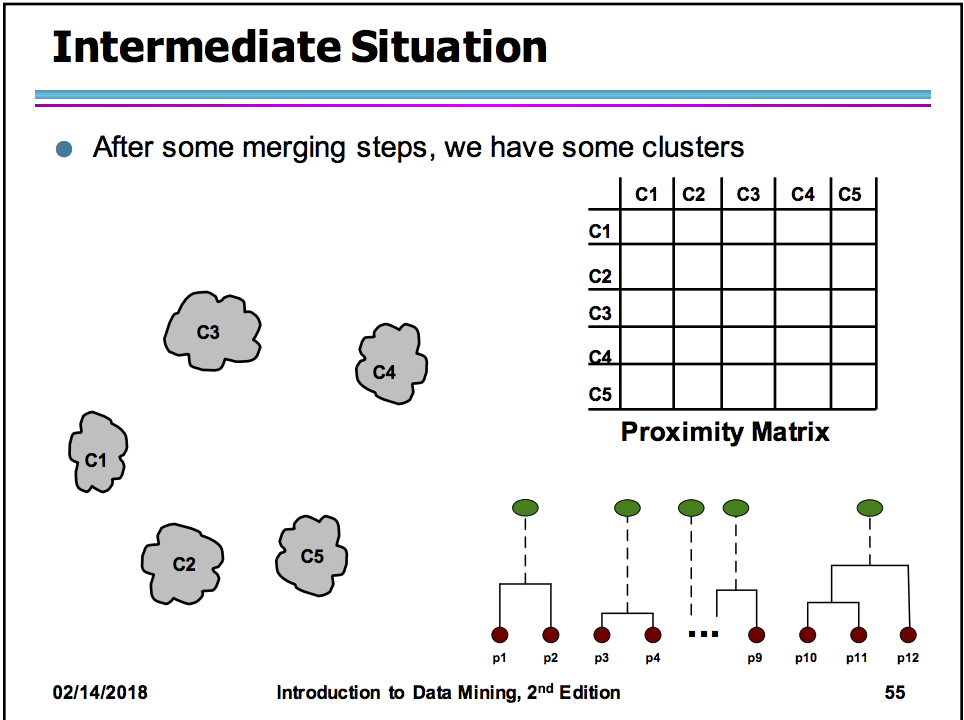

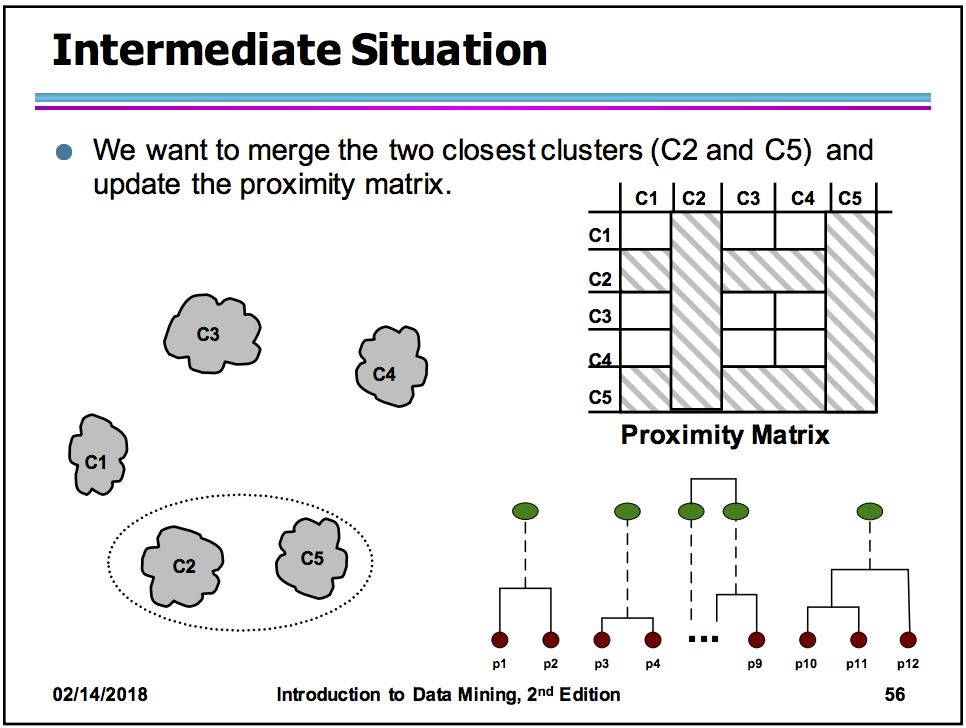

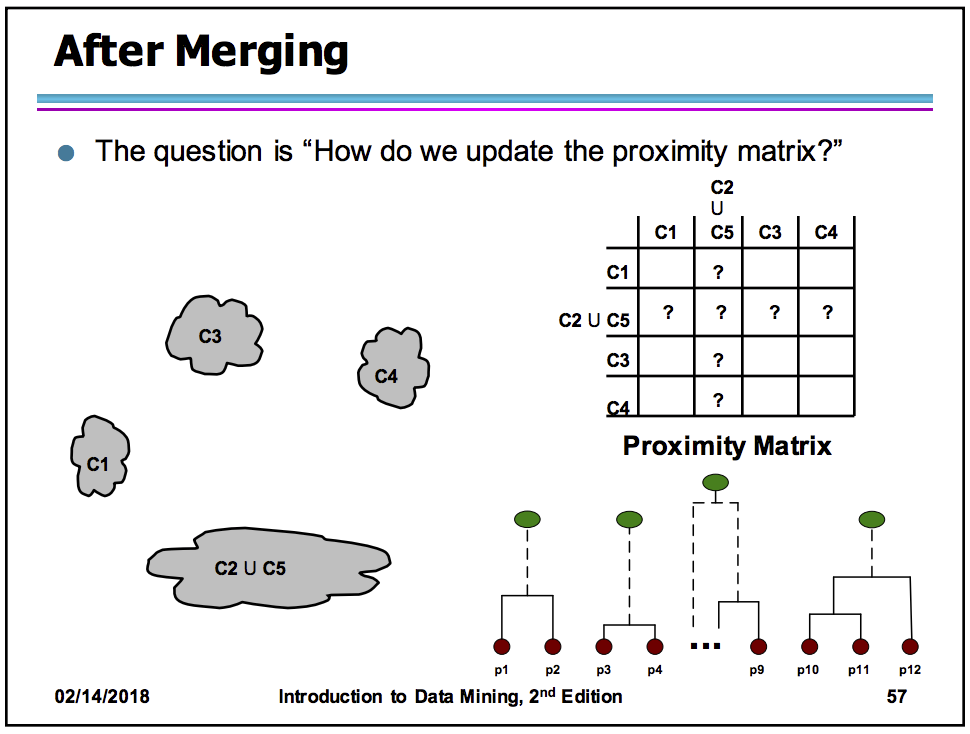

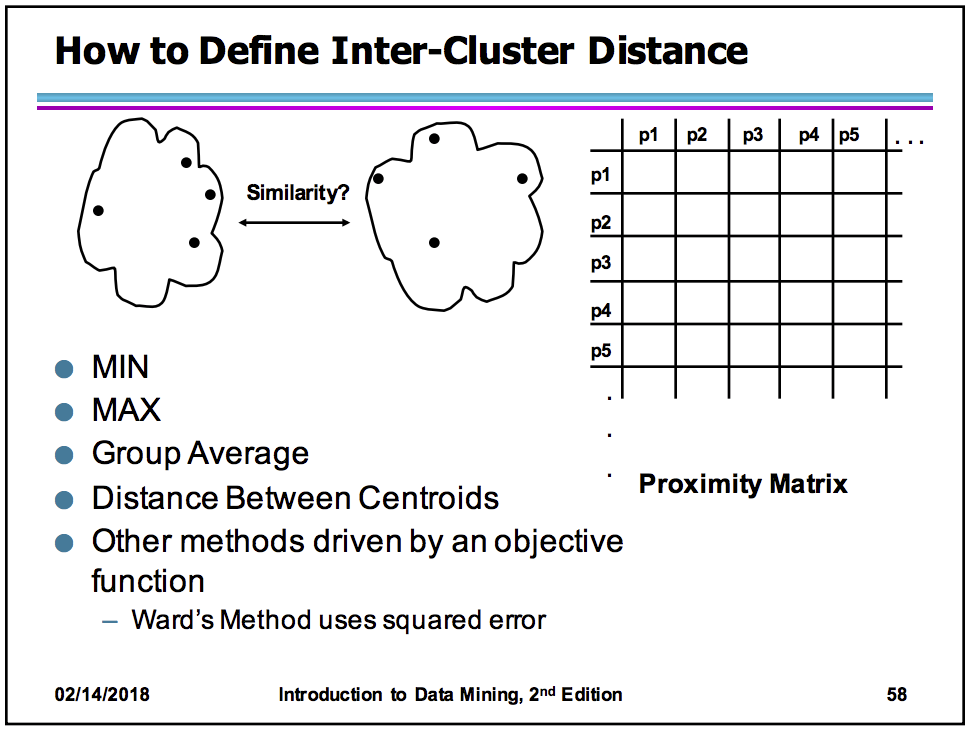

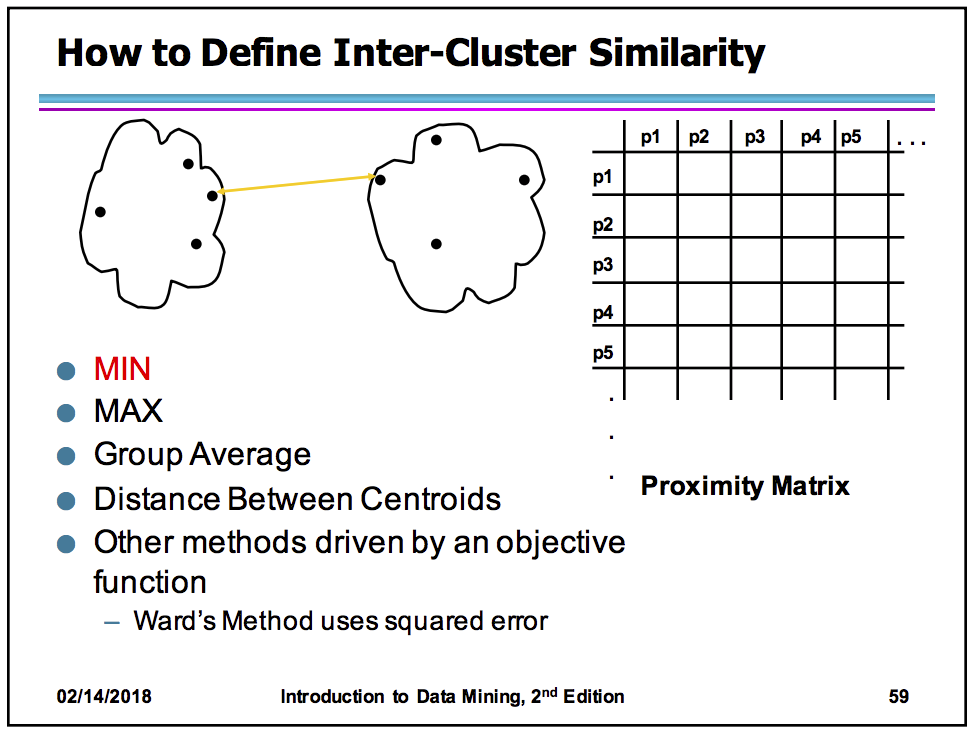

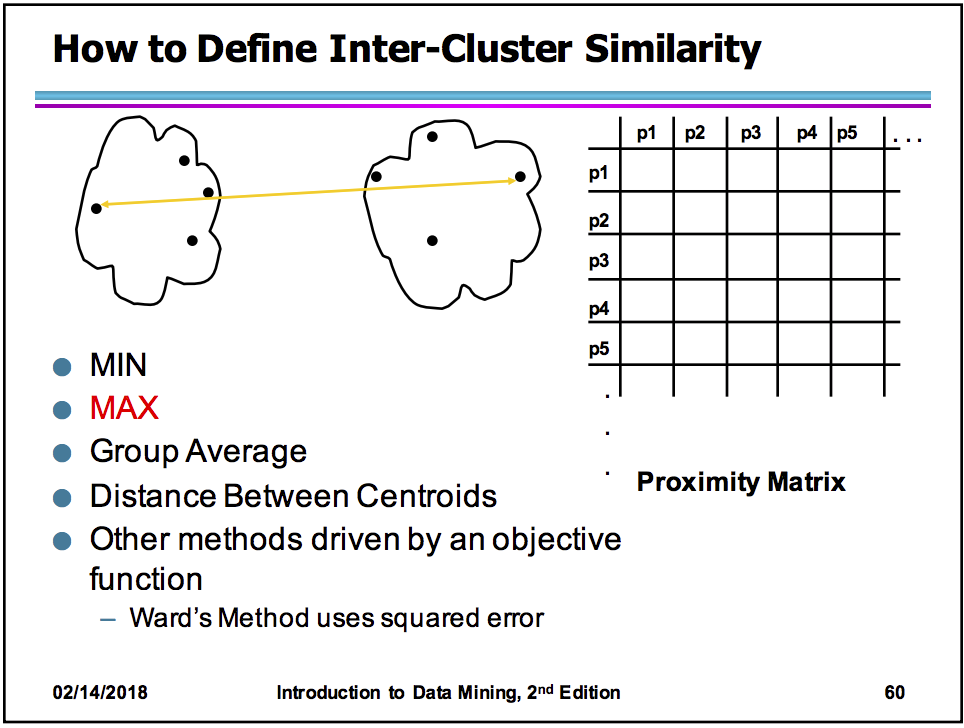

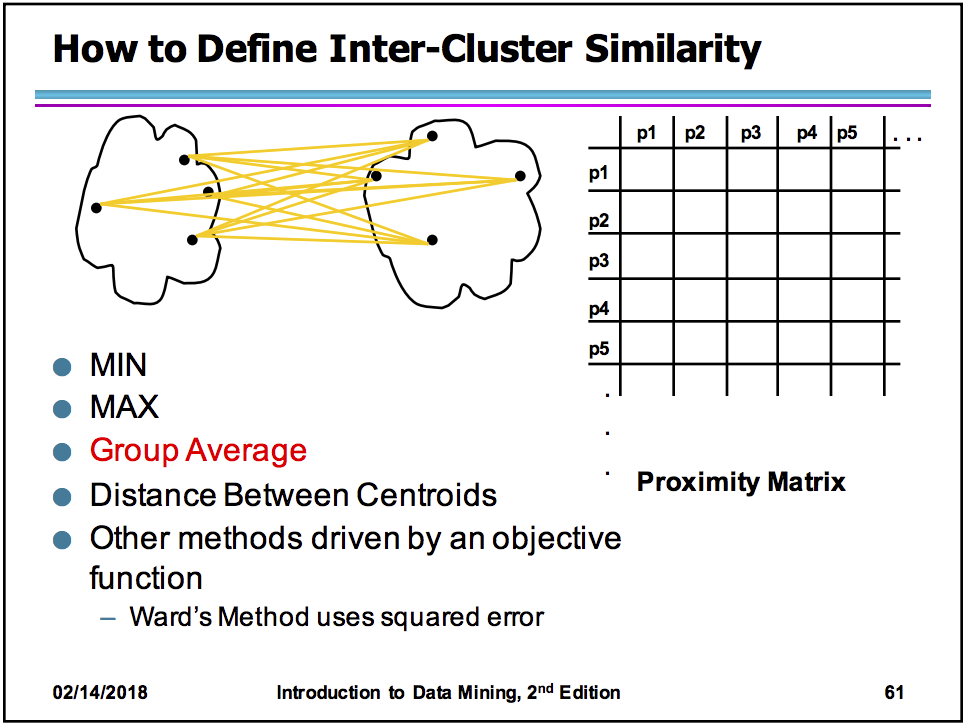

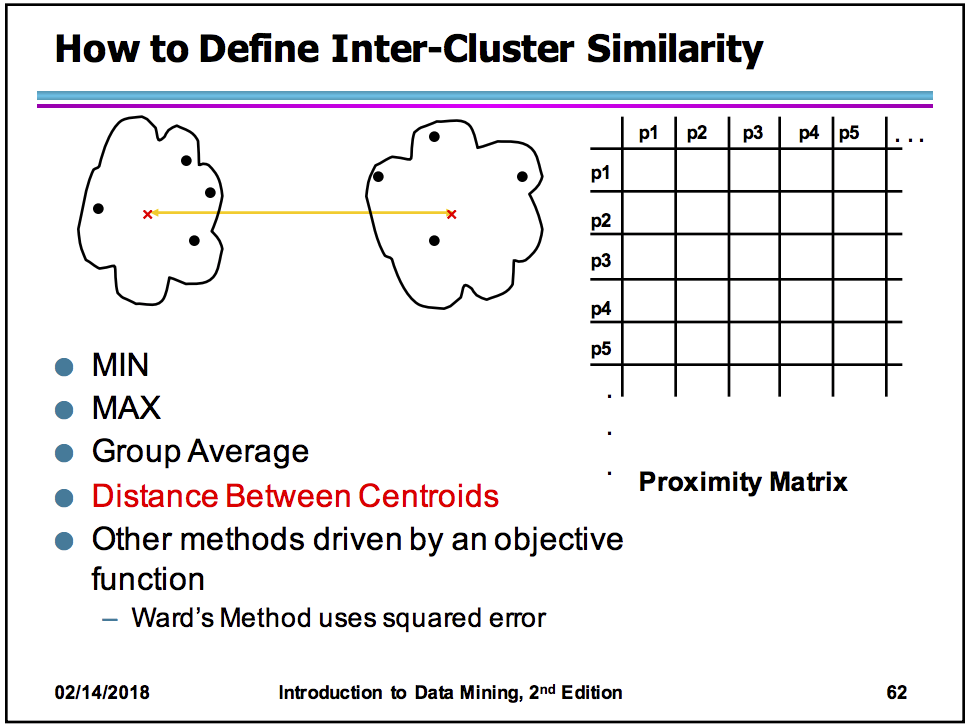

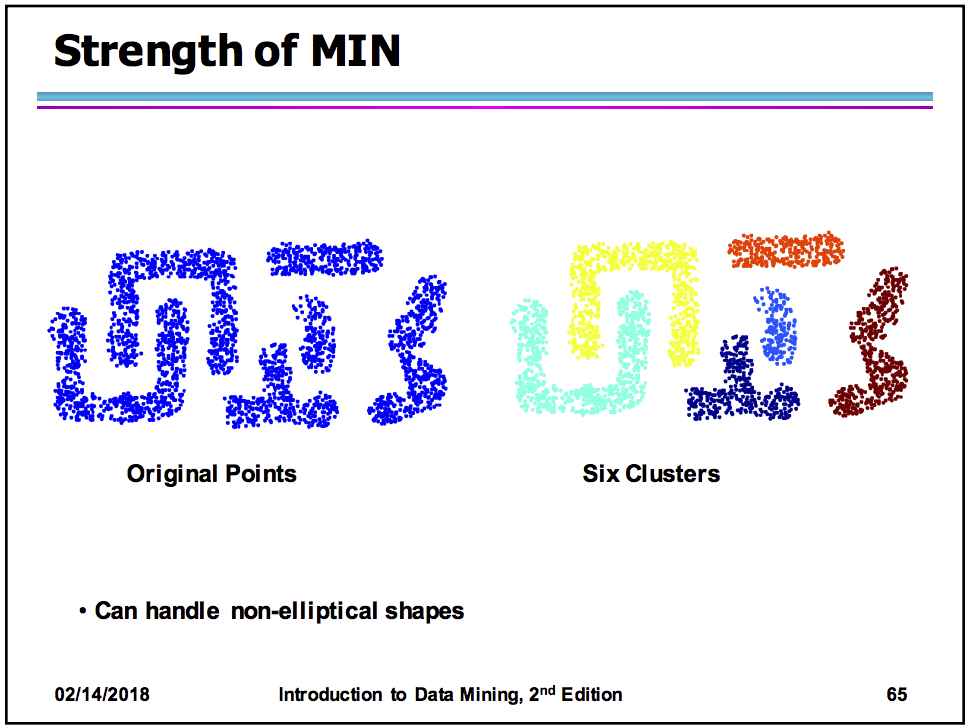

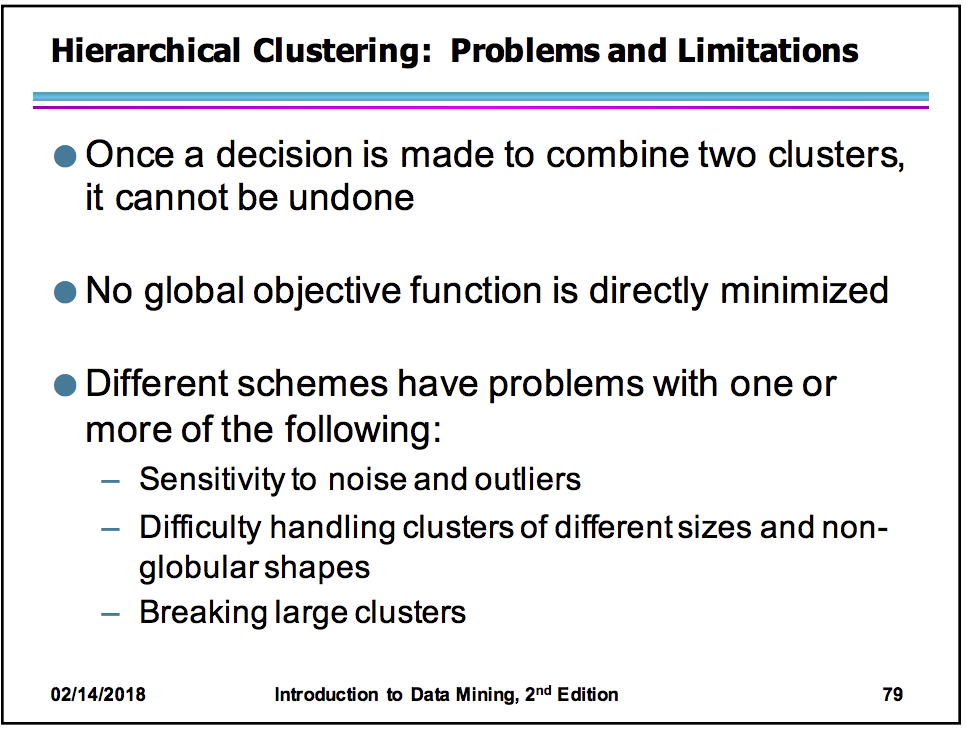

# Agglomerative Clustering Example: Single Linkage (MIN)

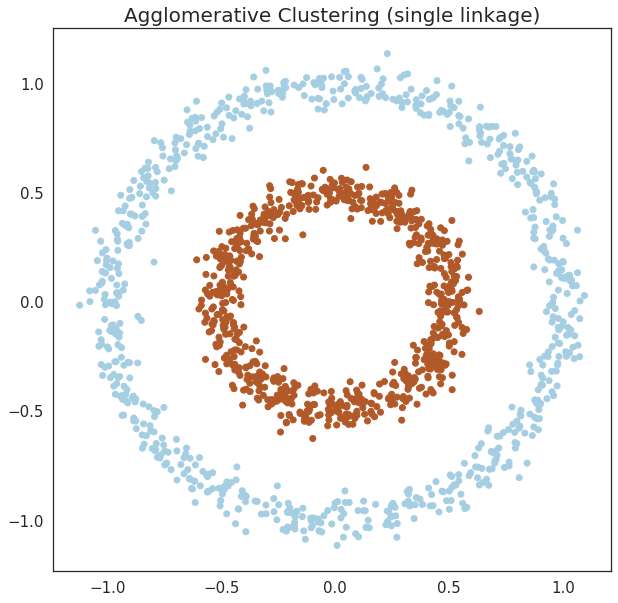

In [179]:
#Set 2 clusters
k = 2
model = sklearn.cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
#Predict the clusters on all the data
clusters = model.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('Agglomerative Clustering (single linkage)',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.show()

# Option 2: Density-based clustering

Note: The source of the following slides is: https://www-users.cs.umn.edu/~kumar001/dmbook/index.php

The slides themselves are derived from "Introduction to Data Mining" (Tan et al., 2019).

# DBSCAN

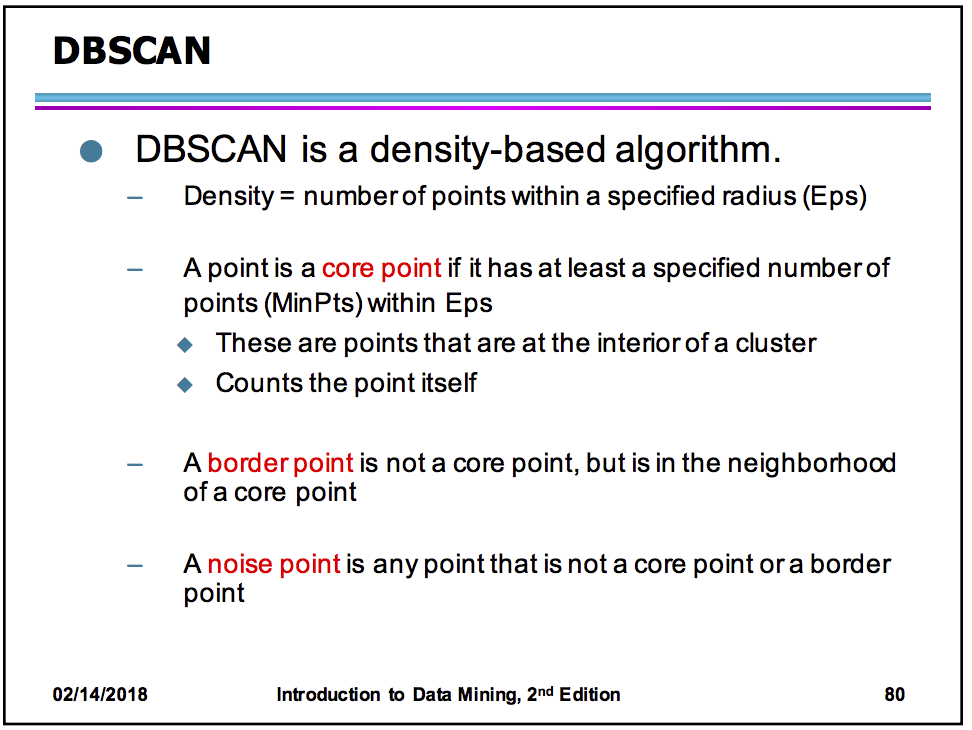

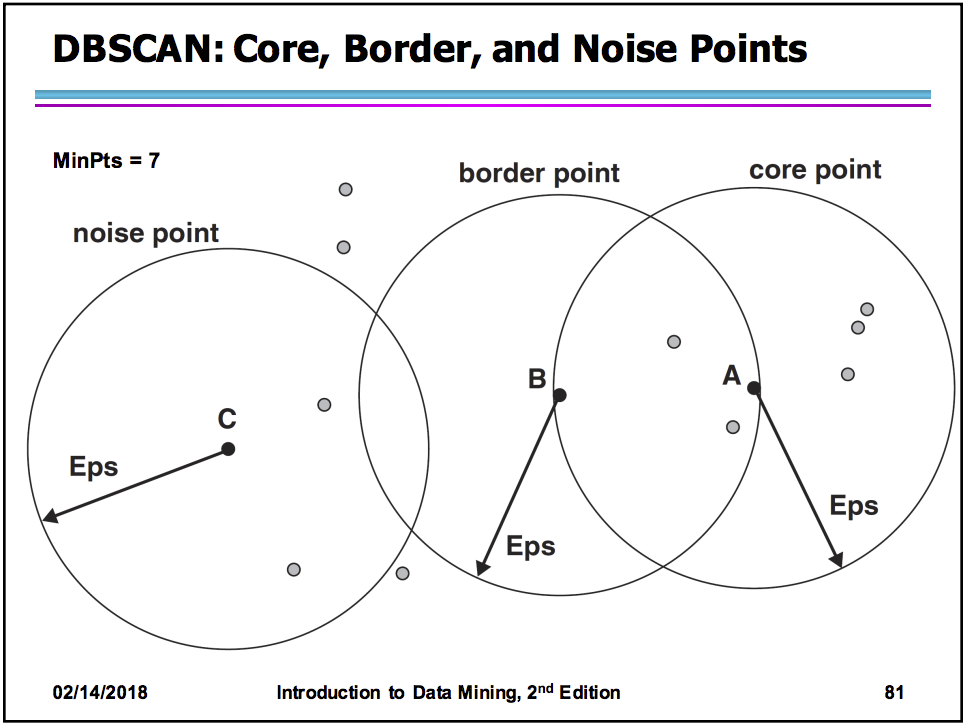

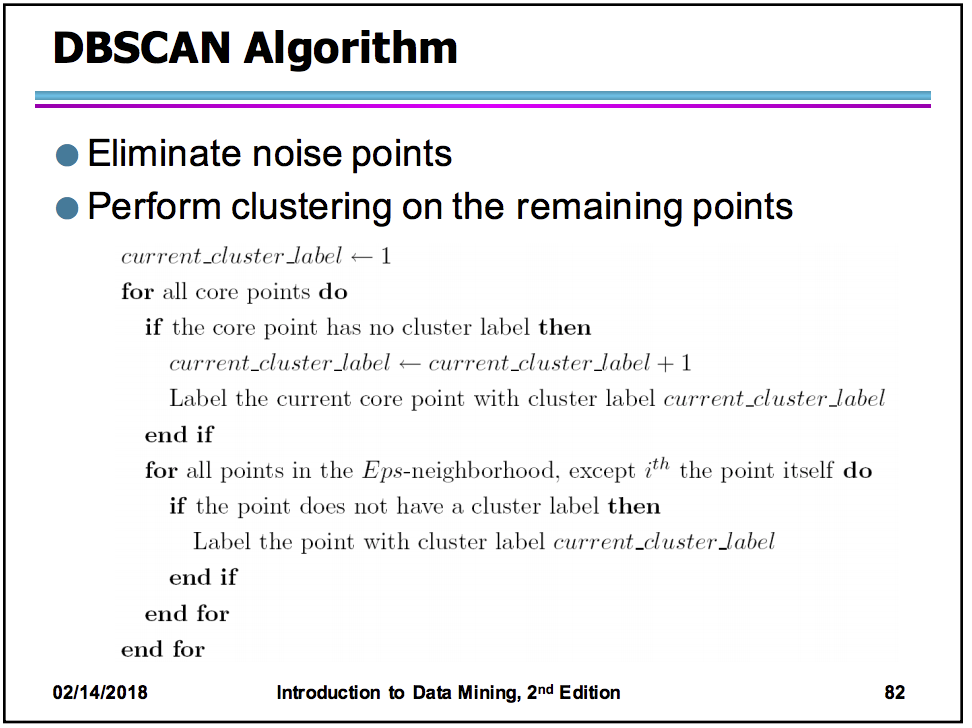

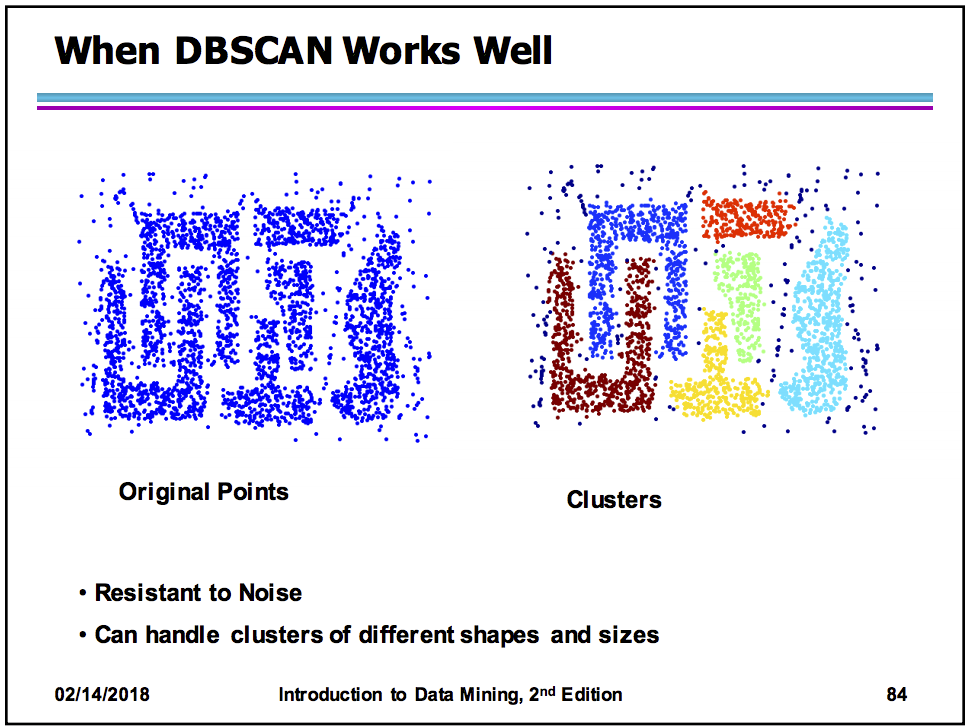

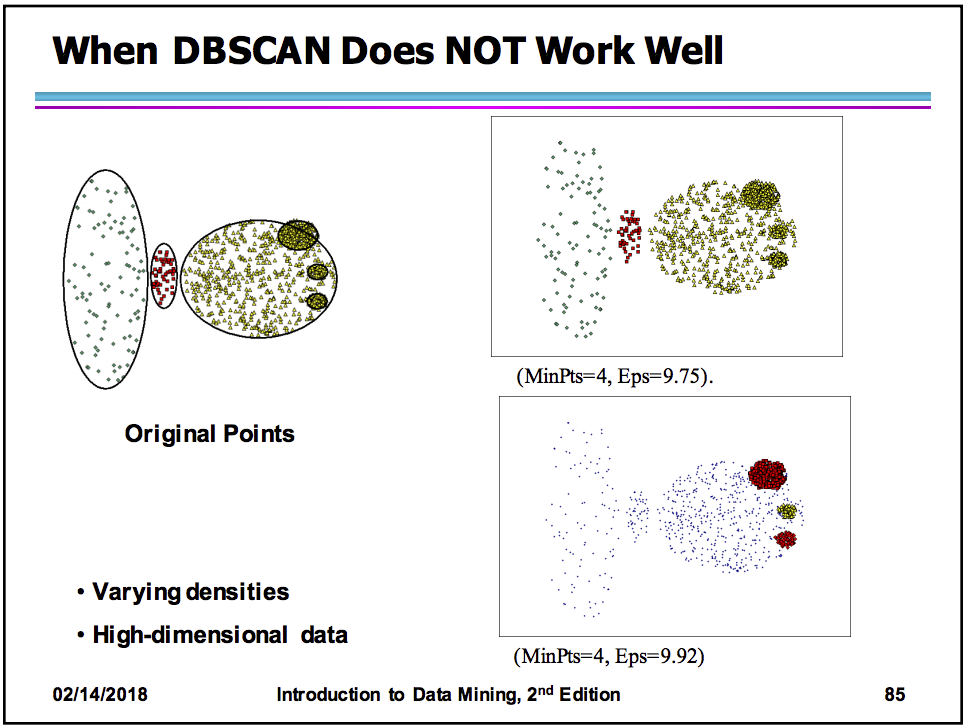

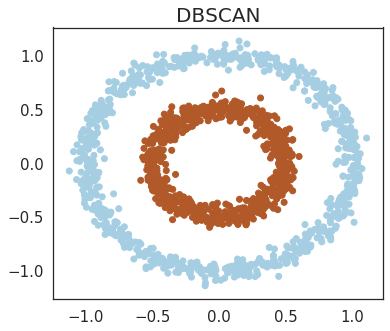

In [175]:
#Set 2 clusters
k = 2
#model = sklearn.cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
model = sklearn.cluster.DBSCAN(eps=0.25, min_samples=100)
#Predict the clusters on all the data
clusters = model.fit_predict(X)
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('DBSCAN',fontsize=20)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.show()

## Cluster analysis seeks to reduce the sample size. 

## Next Tuesday we will look at reducing dimensions (e.g., Principal Component Analysis).